<a href="https://colab.research.google.com/github/thekarandeveloper/ecommerce-recommendation/blob/master/Recommendation_System_Apriori.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install apyori matplotlib

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5954 sha256=b61a3953f37563bbc5923d8860f94a24921370b9e182424fffb3740c418c79f8
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [ ]:
import numpy as np
import pandas as pd
# from mlxtend.frequent_patterns import apriori, association_rules
from apyori import apriori
import random
import matplotlib

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Market_Basket_Optimisation.csv', header=None)
data = data.fillna(0)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,chutney,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,turkey,avocado,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,mineral water,milk,energy bar,whole wheat rice,green tea,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
temperature_list = []
for i in range(0,7501):
    temperature = random.randint(1,60)
    formatted_temp = str(temperature).zfill(2)
    temperature_list.append(formatted_temp)

data.insert(0,"temp",temperature_list)


In [ ]:
season_list = []

def tempToSeasons(temp_data):
    season_category = str()
    if temp_data<=0:
        season_category = "Extreme Cold"
    elif 0 < temp_data <= 10:
        season_category = "Winter"
    elif 10 < temp_data <= 20:
        season_category = "Spring"
    elif 45 > temp_data > 20:
        season_category = "Summer"
    elif temp_data >= 45:
        season_category = "Extereme Hot"
    return season_category

for i in range(0,7501):

    season_list.append(tempToSeasons(int(data['temp'][i])))

data.insert(0,"season",season_list)


data.head()


,season,temp,0,1,2,3,4,5,6,7,...,10,11,12,13,14,15,16,17,18,19
0,Extereme Hot,56,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,...,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,Winter,06,burgers,meatballs,eggs,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Summer,27,chutney,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Extereme Hot,53,turkey,avocado,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Extereme Hot,48,mineral water,milk,energy bar,whole wheat rice,green tea,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
transactions = []

for i in range(0, 7501):
    transactions.append([str(data.values[i,j]) for j in range(0, 22) if str(data.values[i,j])!='0'])



In [ ]:


def filterBySeason(seasonName):
  filtered_transactions = []
  for i in range(0,7501):
    if transactions[i][0] ==str(seasonName):
      filtered_transactions.append(transactions[i])
  return filtered_transactions




In [ ]:

def seasonsToTemp(season_data):
    temp_range = str()
    if season_data == "Extreme Cold":
        temp_range = "-100° -> 0°"
    elif season_data == "Winter":
        temp_range = "0° -> 10°"
    elif season_data == "Spring":
        temp_range = "10° -> 20°"
    elif season_data == "Summer":
        temp_range = "20° -> 45°"
    elif season_data == "Extereme Hot":
        temp_range = "-45° -> 100°"
    return temp_range

In [ ]:
season_name= "Summer"
season_temp=seasonsToTemp(season_name)
filtered_transactions = filterBySeason(season_name)

In [ ]:
print(filtered_transactions)

[['Summer', '27', 'chutney'], ['Summer', '26', 'low fat yogurt'], ['Summer', '42', 'frozen vegetables', 'spaghetti', 'green tea'], ['Summer', '29', 'french fries'], ['Summer', '24', 'mineral water', 'salmon'], ['Summer', '22', 'mineral water'], ['Summer', '34', 'turkey', 'eggs'], ['Summer', '44', 'red wine', 'shrimp', 'pasta', 'pepper', 'eggs', 'chocolate', 'shampoo'], ['Summer', '32', 'rice', 'sparkling water'], ['Summer', '42', 'spaghetti', 'mineral water', 'ham', 'body spray', 'pancakes', 'green tea'], ['Summer', '29', 'parmesan cheese', 'spaghetti', 'soup', 'avocado', 'milk', 'fresh bread'], ['Summer', '35', 'ground beef', 'spaghetti', 'mineral water', 'milk', 'energy bar', 'black tea', 'salmon', 'frozen smoothie', 'escalope'], ['Summer', '35', 'cookies'], ['Summer', '41', 'mineral water', 'cake', 'cottage cheese'], ['Summer', '33', 'spaghetti'], ['Summer', '26', 'mineral water', 'chicken', 'cereals', 'clothes accessories'], ['Summer', '22', 'mineral water', 'bug spray'], ['Summer'

In [ ]:
for i in range(len(filtered_transactions)-1):
  del filtered_transactions[i][0:2]
print(filtered_transactions)

[['chutney'], ['low fat yogurt'], ['frozen vegetables', 'spaghetti', 'green tea'], ['french fries'], ['mineral water', 'salmon'], ['mineral water'], ['turkey', 'eggs'], ['red wine', 'shrimp', 'pasta', 'pepper', 'eggs', 'chocolate', 'shampoo'], ['rice', 'sparkling water'], ['spaghetti', 'mineral water', 'ham', 'body spray', 'pancakes', 'green tea'], ['parmesan cheese', 'spaghetti', 'soup', 'avocado', 'milk', 'fresh bread'], ['ground beef', 'spaghetti', 'mineral water', 'milk', 'energy bar', 'black tea', 'salmon', 'frozen smoothie', 'escalope'], ['cookies'], ['mineral water', 'cake', 'cottage cheese'], ['spaghetti'], ['mineral water', 'chicken', 'cereals', 'clothes accessories'], ['mineral water', 'bug spray'], ['avocado', 'muffins'], ['fresh tuna', 'mineral water', 'eggs'], ['french fries', 'escalope', 'champagne'], ['tomato sauce', 'light mayo'], ['turkey', 'fresh tuna', 'frozen vegetables', 'tomatoes', 'ground beef', 'spaghetti', 'mineral water', 'chocolate', 'soup', 'milk', 'olive oi

In [ ]:

#create an object of apriori function and set the threshold values for metrics
rules = apriori(filtered_transactions, min_support=0.003, min_confidence=0.2, min_lift=3, min_length=2)
rules_list = list(rules)

#converting the list to a dataframe
result = pd.DataFrame(rules_list)

#save support to a separate column
support = result.support

#all four empty lists will contain the items, confidence and lift respectively.
item1 = []
item2 = []
confidence = []
lift = []

#first and second item are frozensets and it has to be converted to a list
for i in range(result.shape[0]):
    list1 = result['ordered_statistics'][i][0]
    item1.append(list(list1[0]))
    item2.append(list(list1[1]))
    confidence.append(list1[2])
    lift.append(list1[3])

#convert the lists to dataframe
item_1 = pd.DataFrame(item1)
item_2 = pd.DataFrame(item2)
conf =pd.DataFrame(confidence,columns=['Confidence'])
lift_m = pd.DataFrame(lift,columns=['Lift'])


season_list=[]

#concatenate the individual dataframes to a single dataframe
final_result = pd.concat([item_1,item_2,support,conf,lift_m], axis=1)

#fill the missing values
final_result = final_result.fillna(value=' ')


#rename the columns
# final_result.columns = ['Item1','Item2','Item3','Item4','Item5','Support','Confidence','Lift']

for i in range (len(final_result)):
  season_list.append(season_temp)

season_list = pd.DataFrame(season_list)
final_data= pd.concat([season_list,final_result],axis=1)
final_data.columns=['Season','Item1','Item2','Item3','Item4','Item5','Support','Confidence','Lift']
final_data.head(10)

,Season,Item1,Item2,Item3,Item4,Item5,Support,Confidence,Lift
0,20° -> 45°,almonds,,,burgers,,0.005794,0.283333,3.136981
1,20° -> 45°,bacon,,,burgers,,0.003067,0.333333,3.690566
2,20° -> 45°,light cream,,,chicken,,0.004431,0.282609,4.848970
3,20° -> 45°,cottage cheese,,,frozen smoothie,,0.007157,0.216495,3.920962
4,20° -> 45°,mushroom cream sauce,,,escalope,,0.005112,0.267857,3.431847
5,20° -> 45°,pasta,,,escalope,,0.004090,0.255319,3.271207
6,20° -> 45°,flax seed,,,green tea,,0.004772,0.451613,3.363026
7,20° -> 45°,fresh tuna,,,honey,,0.004772,0.215385,4.546320
8,20° -> 45°,fromage blanc,,,honey,,0.004090,0.315789,6.665657
9,20° -> 45°,parmesan cheese,,,frozen vegetables,,0.005112,0.294118,3.126598


from matplotlib import pyplot as plt
_df_8['Support'].plot(kind='hist', bins=20, title='Support')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Confidence'].plot(kind='hist', bins=20, title='Confidence')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Lift'].plot(kind='hist', bins=20, title='Lift')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_11.groupby('Item4').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_12.plot(kind='scatter', x='Support', y='Confidence', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13.plot(kind='scatter', x='Confidence', y='Lift', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Support'].plot(kind='line', figsize=(8, 4), title='Support')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Confidence'].plot(kind='line', figsize=(8, 4), title='Confidence')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['Lift'].plot(kind='line', figsize=(8, 4), title='Lift')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['Item4'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='Support', y='Item4', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['Item4'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='Confidence', y='Item4', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['Item4'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='Lift', y='Item4', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

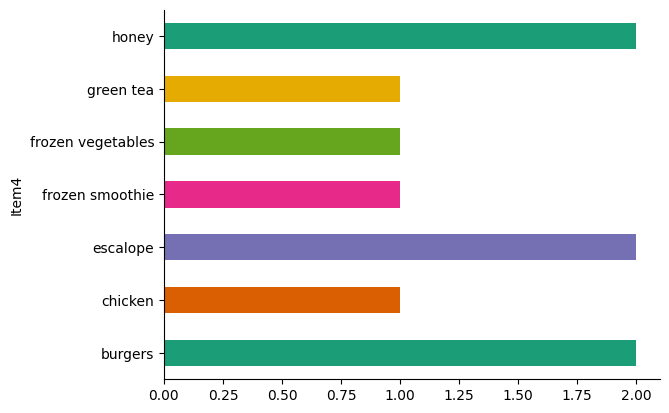

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_11.groupby('Item4').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
from matplotlib import pyplot as plt
_df_10['Confidence'].plot(kind='hist', bins=20, title='Confidence')
plt.gca().spines[['top', 'right',]].set_visible(False)

NameError: ignored

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Confidence']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_16.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Confidence')

In [ ]:
from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Confidence', y='Lift', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='Support', y='Confidence', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
from matplotlib import pyplot as plt
_df_8['Lift'].plot(kind='line', figsize=(8, 4), title='Lift')
plt.gca().spines[['top', 'right']].set_visible(False)